In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Activation, Dense,LSTM,Dropout
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')

In [2]:
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [3]:
doge_price = pd.read_csv('csv/doge_price.csv')
tesla_price = pd.read_csv('csv/tesla_price.csv')
twitter_price = pd.read_csv('csv/twitter_price.csv')

In [4]:
print(f"Shape of doge_price df: "+ str(doge_price.shape))
print(f"Shape of tesla_price df: "+ str(tesla_price.shape))
print(f"Shape of twitter_price df: "+ str(twitter_price.shape))

Shape of doge_price df: (1707, 7)
Shape of tesla_price df: (3030, 7)
Shape of twitter_price df: (2183, 7)


In [5]:
end_date = doge_price['Date'].iloc[-1]
end_date

'2022-07-12'

In [6]:
doge_price['Date'] = pd.to_datetime(doge_price['Date'], format='%Y-%m-%d')
tesla_price['Date'] = pd.to_datetime(tesla_price['Date'], format='%Y-%m-%d')
twitter_price['Date'] = pd.to_datetime(twitter_price['Date'], format='%Y-%m-%d')

In [7]:
doge_price.set_index("Date",inplace = True)
tesla_price.set_index("Date",inplace = True)
twitter_price.set_index("Date",inplace = True)

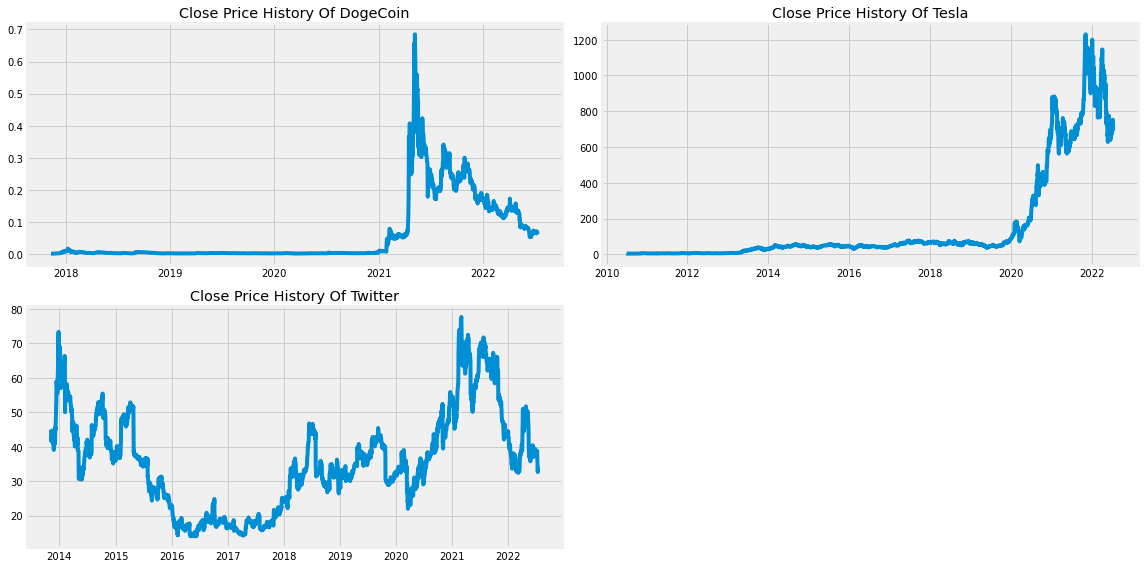

In [8]:
# Let's see a historical view of the closing price

plt.figure(figsize=(16, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)

# Plot the closing price of DogeCoin
plt.subplot(2, 2, 1)
plt.title('Close Price History Of DogeCoin')
plt.plot(doge_price['Close'])

# Plot the closing price of Tesla
plt.subplot(2, 2, 2)
plt.title('Close Price History Of Tesla')
plt.plot(tesla_price['Close'])

# Plot the closing price of Twitter
plt.subplot(2, 2, 3)
plt.title('Close Price History Of Twitter')
plt.plot(twitter_price['Close'])

plt.tight_layout()
plt.show()

### DogeCoin Prediction

In [9]:
data = doge_price.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)
price_column = 'Close'
data.head()

,Close
Date,
2017-11-09,0.001415
2017-11-10,0.001163
2017-11-11,0.001201
2017-11-12,0.001038
2017-11-13,0.001211


In [10]:
# This function splits the data in 70,30 ratio.
def train_test_split(df, test_size=0.3):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [11]:
train, test = train_test_split(data, test_size=0.2)

In [12]:
train.shape, test.shape

((1366, 1), (341, 1))

In [13]:
train

,Close
Date,
2017-11-09,0.001415
2017-11-10,0.001163
2017-11-11,0.001201
2017-11-12,0.001038
2017-11-13,0.001211
...,...
2021-08-01,0.204437
2021-08-02,0.203600
2021-08-03,0.195967


In [14]:
test

,Close
Date,
2021-08-06,0.204688
2021-08-07,0.260341
2021-08-08,0.240045
2021-08-09,0.256897
2021-08-10,0.257325
...,...
2022-07-08,0.069257
2022-07-09,0.069512
2022-07-10,0.067263


In [15]:
# Perform MinMax scaling
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(data).reshape(-1,1))
df1

array([[0.00055138],
       [0.00018282],
       [0.0002384 ],
       ...,
       [0.09685713],
       [0.08893598],
       [0.08691036]])

In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.8)
# test_size=len(df1)-training_size

test_size = 0.2
split_row = len(df1) - int(test_size * len(df1))
# train_data = df.iloc[:split_row]
# test_data = df.iloc[split_row:]
    
train_scaled,test_scaled=df1[0:split_row,:],df1[split_row:,]
training_size,split_row

(1365, 1366)

In [17]:
train_scaled.shape,test_scaled.shape

((1366, 1), (341, 1))

In [18]:
train_scaled

array([[5.51379986e-04],
       [1.82818298e-04],
       [2.38395060e-04],
       ...,
       [2.85092704e-01],
       [2.93170347e-01],
       [2.92415673e-01]])

In [19]:
test_scaled

array([[0.29784757],
       [0.37924266],
       [0.34955882],
       [0.37420565],
       [0.37483162],
       [0.38644132],
       [0.38447858],
       [0.41795188],
       [0.42717323],
       [0.49785518],
       [0.46754244],
       [0.43642969],
       [0.44271425],
       [0.46231969],
       [0.47745265],
       [0.46181218],
       [0.45912987],
       [0.46344585],
       [0.42077606],
       [0.42587596],
       [0.39177376],
       [0.4291038 ],
       [0.41622754],
       [0.40964023],
       [0.39647731],
       [0.4057323 ],
       [0.42905699],
       [0.43132979],
       [0.43179488],
       [0.43635071],
       [0.4584922 ],
       [0.45006501],
       [0.36959425],
       [0.37452156],
       [0.36791524],
       [0.34946668],
       [0.35158737],
       [0.36502086],
       [0.34350534],
       [0.35052995],
       [0.36075023],
       [0.35322981],
       [0.34939063],
       [0.3515201 ],
       [0.33946287],
       [0.30133282],
       [0.29249319],
       [0.327

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, ytest = create_dataset(test_scaled, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(1265, 100)
(1265,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(240, 100)
(240,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
print(X_train.shape), print(y_train.shape)

(1265, 100, 1)
(1265,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(240, 100, 1)
(240,)


(None, None)

In [27]:
X_test

array([[[0.29784757],
        [0.37924266],
        [0.34955882],
        ...,
        [0.38045073],
        [0.37788688],
        [0.38123904]],

       [[0.37924266],
        [0.34955882],
        [0.37420565],
        ...,
        [0.37788688],
        [0.38123904],
        [0.38300287]],

       [[0.34955882],
        [0.37420565],
        [0.37483162],
        ...,
        [0.38123904],
        [0.38300287],
        [0.37366744]],

       ...,

       [[0.20005879],
        [0.20516162],
        [0.20164858],
        ...,
        [0.0987877 ],
        [0.10176836],
        [0.09977345]],

       [[0.20516162],
        [0.20164858],
        [0.21267618],
        ...,
        [0.10176836],
        [0.09977345],
        [0.1001464 ]],

       [[0.20164858],
        [0.21267618],
        [0.21580311],
        ...,
        [0.09977345],
        [0.1001464 ],
        [0.09685713]]])

In [28]:
ytest

array([0.38300287, 0.37366744, 0.34546954, 0.34581763, 0.32226478,
       0.33941606, 0.33929028, 0.32949707, 0.31976822, 0.32976618,
       0.32291123, 0.31486869, 0.29228843, 0.29881139, 0.3019193 ,
       0.31318529, 0.31251252, 0.30486633, 0.30521588, 0.29098092,
       0.26006268, 0.24895026, 0.25940015, 0.25706739, 0.26049852,
       0.24636009, 0.23895668, 0.24568   , 0.24695534, 0.228928  ,
       0.26196985, 0.2633227 , 0.2521664 , 0.24566684, 0.25062487,
       0.24649464, 0.24319806, 0.24883325, 0.25181539, 0.26830706,
       0.27142521, 0.27732658, 0.27639494, 0.27300915, 0.25313607,
       0.24384597, 0.24903509, 0.24784018, 0.25155359, 0.25355435,
       0.24724347, 0.24536409, 0.23164102, 0.23280082, 0.2252102 ,
       0.22072165, 0.21942145, 0.20815106, 0.22283503, 0.23490542,
       0.25010274, 0.2669308 , 0.2692036 , 0.25760999, 0.24878938,
       0.24051136, 0.23593506, 0.22547493, 0.20709949, 0.19284259,
       0.20596309, 0.20001784, 0.20769767, 0.20877996, 0.20506

In [29]:
np.random.seed(42)
window_len = 100
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 100
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'
activ_func = "relu"

In [30]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(dropout))
model.add(Dense(units=1))
model.add(Activation(activ_func))
model.compile(loss=loss, optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/100
40/40 [==============================] - 5s 62ms/step - loss: 0.0025
Epoch 2/100
40/40 [==============================] - 2s 62ms/step - loss: 0.0012
Epoch 3/100
40/40 [==============================] - 2s 60ms/step - loss: 0.0014
Epoch 4/100
40/40 [==============================] - 2s 60ms/step - loss: 0.0013
Epoch 5/100
40/40 [==============================] - 2s 60ms/step - loss: 0.0011
Epoch 6/100
40/40 [==============================] - 2s 60ms/step - loss: 9.9783e-04
Epoch 7/100
40/40 [==============================] - 3s 62ms/step - loss: 9.6931e-04
Epoch 8/100
40/40 [==============================] - 2s 60ms/step - loss: 8.3081e-04
Epoch 9/100
40/40 [==============================] - 2s 59ms/step - loss: 8.6673e-04
Epoch 10/100
40/40 [==============================] - 2s 60ms/step - loss: 0.0010
Epoch 11/100
40/40 [==============================] - 2s 62ms/step - loss: 7.1509e-04
Epoch 12/100
40/40 [==============================] - 2s 60ms/step - loss: 8.4517e-04
E

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 27ms/step


In [33]:
test_predict

array([[0.3855347 ],
       [0.39439917],
       [0.39390203],
       [0.37142205],
       [0.3538855 ],
       [0.33183146],
       [0.3347512 ],
       [0.3453468 ],
       [0.34839493],
       [0.3408029 ],
       [0.33875665],
       [0.33350345],
       [0.32579634],
       [0.30779073],
       [0.30218354],
       [0.30598998],
       [0.31963462],
       [0.32877588],
       [0.3259625 ],
       [0.31958944],
       [0.304904  ],
       [0.27643386],
       [0.2540946 ],
       [0.2542368 ],
       [0.2618117 ],
       [0.27215537],
       [0.26821616],
       [0.25608677],
       [0.25052732],
       [0.25024062],
       [0.24136409],
       [0.25789845],
       [0.27326053],
       [0.27387726],
       [0.26457193],
       [0.25874504],
       [0.2538417 ],
       [0.25108117],
       [0.25535274],
       [0.26194426],
       [0.2767118 ],
       [0.2870379 ],
       [0.29346874],
       [0.29289976],
       [0.28725895],
       [0.26993537],
       [0.25351974],
       [0.250

In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
test_predict

array([[0.2646431 ],
       [0.2707041 ],
       [0.2703642 ],
       [0.25499374],
       [0.24300332],
       [0.22792411],
       [0.22992045],
       [0.2371651 ],
       [0.2392492 ],
       [0.23405825],
       [0.23265913],
       [0.22906733],
       [0.22379766],
       [0.21148653],
       [0.20765267],
       [0.2102553 ],
       [0.21958466],
       [0.22583489],
       [0.22391129],
       [0.21955377],
       [0.20951277],
       [0.19004661],
       [0.1747724 ],
       [0.17486961],
       [0.18004888],
       [0.18712124],
       [0.18442786],
       [0.17613451],
       [0.1723333 ],
       [0.17213728],
       [0.16606805],
       [0.17737323],
       [0.1878769 ],
       [0.18829857],
       [0.18193616],
       [0.17795208],
       [0.17459947],
       [0.172712  ],
       [0.17563263],
       [0.18013951],
       [0.19023664],
       [0.19729702],
       [0.20169403],
       [0.20130499],
       [0.19744815],
       [0.18560335],
       [0.17437933],
       [0.172

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.04761678197878784

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.057978759734941855

In [38]:
test_predict.shape

(240, 1)

In [39]:
# targets = test[price_column][window_len:]
# preds = model.predict(X_test).squeeze()
# preds
# mean_absolute_error(preds, y_test)

In [40]:
targets = test[price_column][window_len+1:]
targets

Date
2021-11-15    0.256529
2021-11-16    0.237249
2021-11-17    0.237487
2021-11-18    0.221383
2021-11-19    0.233110
                ...   
2022-07-08    0.069257
2022-07-09    0.069512
2022-07-10    0.067263
2022-07-11    0.061847
2022-07-12    0.060462
Name: Close, Length: 240, dtype: float64

In [41]:
preds = pd.Series(index=targets.index, data=test_predict.squeeze())
preds

Date
2021-11-15    0.264643
2021-11-16    0.270704
2021-11-17    0.270364
2021-11-18    0.254994
2021-11-19    0.243003
                ...   
2022-07-08    0.069995
2022-07-09    0.071104
2022-07-10    0.070902
2022-07-11    0.070682
2022-07-12    0.069047
Length: 240, dtype: float32

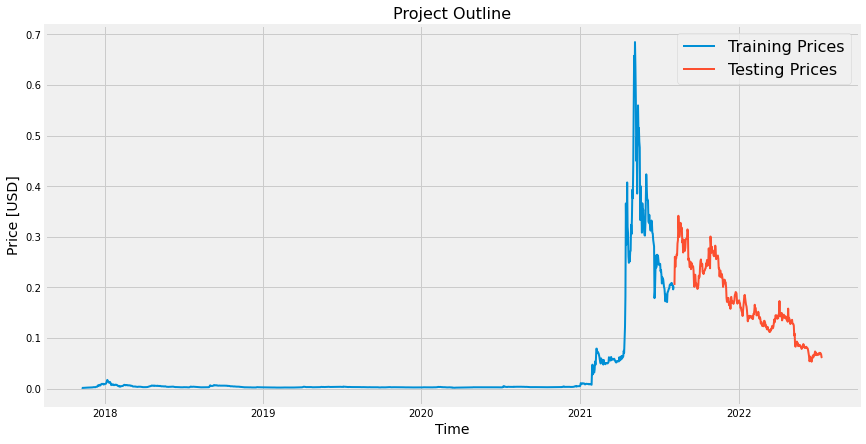

In [42]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('Price [USD]', fontsize=14)
    ax.set_xlabel('Time', fontsize = 14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
line_plot(train["Close"], test["Close"], 'Training Prices', 'Testing Prices', title='Project Outline')

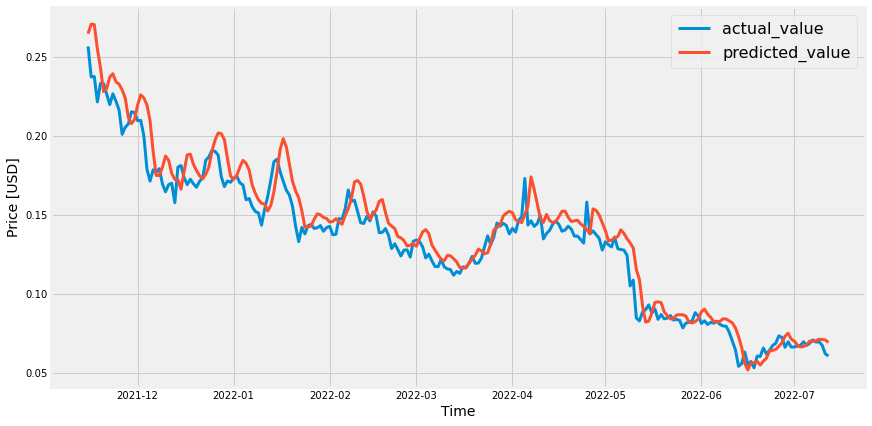

In [43]:
line_plot(targets, preds, 'actual_value', 'predicted_value', lw=3)

### Future Prediction for 30 days

In [44]:
len(test)

341

In [45]:
len(test_scaled)

341

In [46]:
#Getting the last 100 days records
fut_inp = test_scaled[241:]
fut_inp.shape

(100, 1)

In [47]:
fut_inp = fut_inp.reshape(1,-1)

In [48]:
fut_inp.shape

(1, 100)

In [49]:
fut_inp

array([[0.21580311, 0.25136638, 0.20823589, 0.21216283, 0.2069664 ,
        0.20953171, 0.21718375, 0.1954196 , 0.20042443, 0.20335537,
        0.20897155, 0.21205167, 0.20866734, 0.20244713, 0.20365666,
        0.20713606, 0.20452249, 0.19792201, 0.19796589, 0.19481557,
        0.19146048, 0.22950424, 0.1999725 , 0.20279961, 0.19938164,
        0.19596513, 0.18503991, 0.19266855, 0.18998477, 0.18791088,
        0.19710884, 0.18631671, 0.18554302, 0.18500334, 0.18014038,
        0.15179184, 0.15713452, 0.12218551, 0.11939205, 0.12767006,
        0.12981269, 0.13426907, 0.12695341, 0.13042257, 0.12082242,
        0.12531829, 0.12130213, 0.12201293, 0.12441443, 0.12024325,
        0.12080487, 0.11985129, 0.11292906, 0.11743809, 0.11817521,
        0.11941399, 0.12699729, 0.12406342, 0.11703004, 0.11953977,
        0.11613203, 0.11808453, 0.11728306, 0.11918583, 0.11623587,
        0.1146651 , 0.11451446, 0.10883685, 0.10070656, 0.09257626,
        0.07734384, 0.07978776, 0.0906223 , 0.07

In [50]:
tmp_inp = list(fut_inp)

In [51]:
tmp_inp

[array([0.21580311, 0.25136638, 0.20823589, 0.21216283, 0.2069664 ,
        0.20953171, 0.21718375, 0.1954196 , 0.20042443, 0.20335537,
        0.20897155, 0.21205167, 0.20866734, 0.20244713, 0.20365666,
        0.20713606, 0.20452249, 0.19792201, 0.19796589, 0.19481557,
        0.19146048, 0.22950424, 0.1999725 , 0.20279961, 0.19938164,
        0.19596513, 0.18503991, 0.19266855, 0.18998477, 0.18791088,
        0.19710884, 0.18631671, 0.18554302, 0.18500334, 0.18014038,
        0.15179184, 0.15713452, 0.12218551, 0.11939205, 0.12767006,
        0.12981269, 0.13426907, 0.12695341, 0.13042257, 0.12082242,
        0.12531829, 0.12130213, 0.12201293, 0.12441443, 0.12024325,
        0.12080487, 0.11985129, 0.11292906, 0.11743809, 0.11817521,
        0.11941399, 0.12699729, 0.12406342, 0.11703004, 0.11953977,
        0.11613203, 0.11808453, 0.11728306, 0.11918583, 0.11623587,
        0.1146651 , 0.11451446, 0.10883685, 0.10070656, 0.09257626,
        0.07734384, 0.07978776, 0.0906223 , 0.07

In [52]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [53]:
tmp_inp

[0.21580310615600398,
 0.2513663839564512,
 0.20823589118069905,
 0.21216282821368976,
 0.20696640092198926,
 0.20953170727426693,
 0.21718374993966996,
 0.1954195972439776,
 0.20042443095976684,
 0.20335537390729505,
 0.20897155201034312,
 0.21205167468873357,
 0.2086673423630947,
 0.20244713260469274,
 0.20365665846178146,
 0.20713605630218548,
 0.20452248591933472,
 0.19792201410187218,
 0.19796589049330227,
 0.19481556558862373,
 0.1914604841906049,
 0.22950424065323172,
 0.19997250412803716,
 0.20279960628251423,
 0.19938163539011233,
 0.19596512704409141,
 0.18503990557800565,
 0.19266854750131265,
 0.18998477489217377,
 0.18791088412391277,
 0.19710883831403506,
 0.18631670856862048,
 0.18554302153307037,
 0.1850033419184806,
 0.18014037520164858,
 0.15179183869868473,
 0.15713452062848543,
 0.12218551230805907,
 0.11939204872034505,
 0.12767006123681698,
 0.12981269168498508,
 0.1342690705078985,
 0.12695341351012596,
 0.13042257352586295,
 0.12082241908096511,
 0.1253182866561

In [54]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.08709654957056046], [0.08480767905712128], [0.08354143798351288], [0.08295869827270508], [0.08271109312772751], [0.08252943307161331], [0.08225322514772415], [0.08182042837142944], [0.08123691380023956], [0.0805421844124794], [0.07978137582540512], [0.07898835837841034], [0.07817921787500381], [0.07735335826873779], [0.07649841159582138], [0.07559601962566376], [0.0746263712644577], [0.07357102632522583], [0.07241383194923401], [0.07114055752754211], [0.06973785907030106], [0.06819212436676025], [0.06648842990398407], [0.06460974365472794], [0.0625365823507309], [0.06024667248129845], [0.05771477892994881], [0.054912466555833817], [0.05180785432457924], [0.04836509749293327]]


In [55]:
# from datetime import date
# from datetime import datetime

# end_date = test[-1:].index.value()
end_date

'2022-07-12'

In [56]:
temp = pd.to_datetime(end_date, format='%Y-%m-%d')
temp
end_date_new = temp.strftime('%m/%d/%Y')
end_date_new

'07/12/2022'

In [57]:
preds = scaler.inverse_transform(lst_output)
preds

array([[0.06058931],
       [0.05902432],
       [0.05815854],
       [0.0577601 ],
       [0.0575908 ],
       [0.05746659],
       [0.05727774],
       [0.05698182],
       [0.05658285],
       [0.05610783],
       [0.05558764],
       [0.05504542],
       [0.05449218],
       [0.05392751],
       [0.05334295],
       [0.05272595],
       [0.05206296],
       [0.05134138],
       [0.05055016],
       [0.04967957],
       [0.04872049],
       [0.04766361],
       [0.04649873],
       [0.0452142 ],
       [0.0437967 ],
       [0.042231  ],
       [0.04049985],
       [0.03858379],
       [0.03646105],
       [0.0341071 ]])

In [58]:
# preds = pd.Series(data=lst_output.squeeze())
# preds

In [59]:
import datetime
date_future = temp + datetime.timedelta(29)
date_future_str = date_future.strftime('%m/%d/%Y')
date_future_str

'08/10/2022'

In [60]:
c = pd.date_range(start=end_date_new, end=date_future_str)
c

DatetimeIndex(['2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
               '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
               '2022-07-24', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29', '2022-07-30', '2022-07-31',
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08',
               '2022-08-09', '2022-08-10'],
              dtype='datetime64[ns]', freq='D')

In [61]:
len(c)

30

In [62]:
fut_preds = pd.Series(index=c, data=preds.squeeze())
fut_preds

2022-07-12    0.060589
2022-07-13    0.059024
2022-07-14    0.058159
2022-07-15    0.057760
2022-07-16    0.057591
2022-07-17    0.057467
2022-07-18    0.057278
2022-07-19    0.056982
2022-07-20    0.056583
2022-07-21    0.056108
2022-07-22    0.055588
2022-07-23    0.055045
2022-07-24    0.054492
2022-07-25    0.053928
2022-07-26    0.053343
2022-07-27    0.052726
2022-07-28    0.052063
2022-07-29    0.051341
2022-07-30    0.050550
2022-07-31    0.049680
2022-08-01    0.048720
2022-08-02    0.047664
2022-08-03    0.046499
2022-08-04    0.045214
2022-08-05    0.043797
2022-08-06    0.042231
2022-08-07    0.040500
2022-08-08    0.038584
2022-08-09    0.036461
2022-08-10    0.034107
Freq: D, dtype: float64

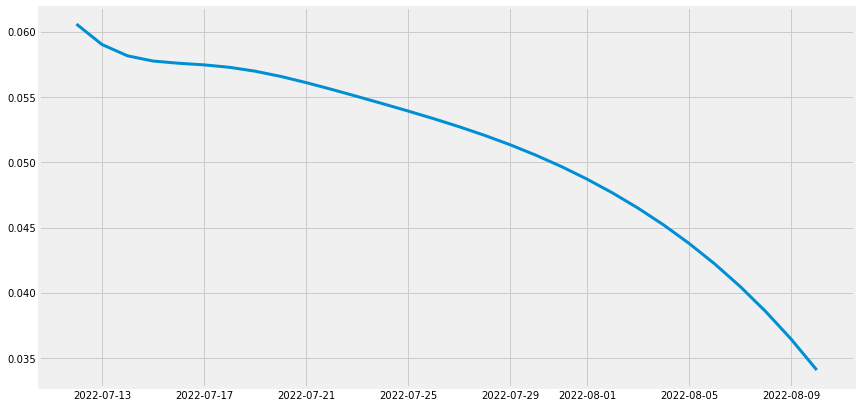

In [63]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(fut_preds, label="predicted value_30", linewidth=3)
# ax.plot(line2, label=label2, linewidth=lw)

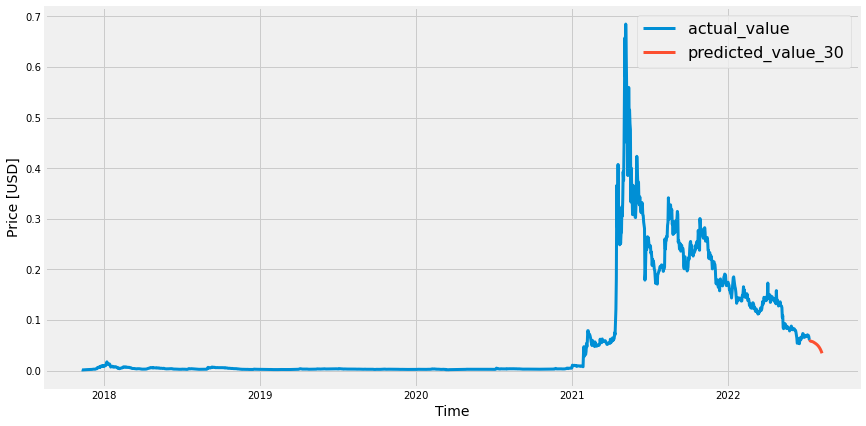

In [64]:
line_plot(doge_price["Close"], fut_preds, 'actual_value', 'predicted_value_30', lw=3)